In [374]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import RRR
reload(RRR)
from RRR import *

import Task_3.LRR as LLR
reload(LLR)
from Task_3.LRR import *

,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196
5,168,74,220
6,137,54,188
7,149,61,188
8,159,65,207
9,128,46,167


,X1,X2,X3
0,0.100,0.214286,0.113208
1,0.375,0.464286,0.320755
2,0.625,0.750000,0.509434
3,0.850,0.964286,0.830189
4,0.650,0.642857,0.547170
5,1.000,1.000000,1.000000
6,0.225,0.285714,0.396226
7,0.525,0.535714,0.396226
8,0.775,0.678571,0.754717
9,0.000,0.000000,0.000000


<Axes: >

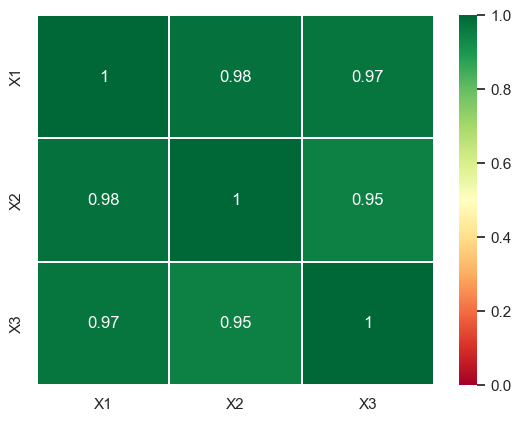

In [375]:
# Read dataframe
data = pd.read_excel('blood.xlsx')
data.dropna(inplace=True)
display(data)

# Dependent variable
explore_column = 'X1' 
 
# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

### Гребневая регрессия

                                      X1                                      
Dep. Variable:                     X1   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.01e-07
Time:                        02:18:39   Log-Likelihood:                 17.472
No. Observations:                  11   AIC:                            -26.94
Df Residuals:                       8   BIC:                            -25.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0365      0.038     -0.966      0.3

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,1.111639,1.111639,330.961873,8.565571e-08
X3,1.0,0.022058,0.022058,6.567259,3.350767e-02
Residual,8.0,0.026871,0.003359,NaN,NaN


Breusch-Pagan test: 
LM statistic: 2.329287116901141      LM-Test p-value: 0.31203386404693556 
F-statistic: 1.0745539142191813       F-Test p-value: 0.3860543775047665


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


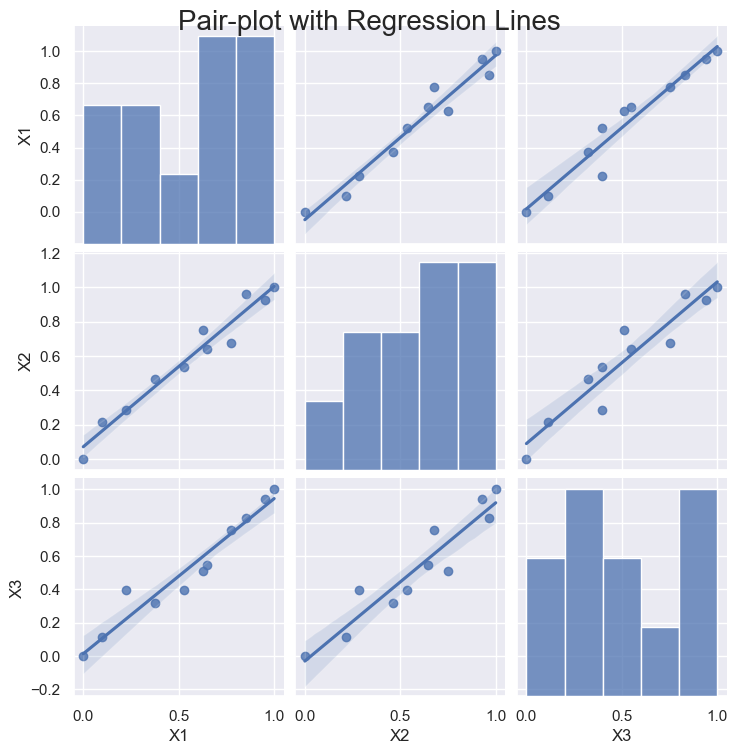

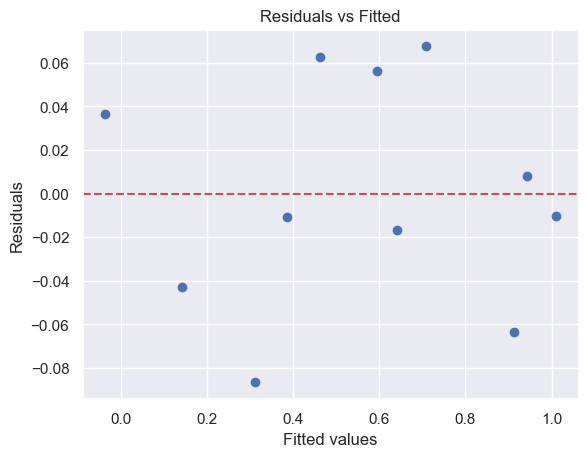

D:\Projects\PyCharm_Projects\Matt\Task_5\RRR.py:92: RuntimeWarning: invalid value encountered in sqrt
  # outlier_test_results = self.results.outlier_test(method='bonferroni')


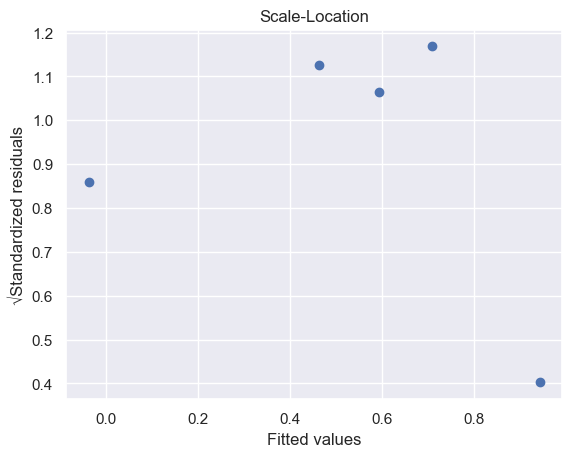

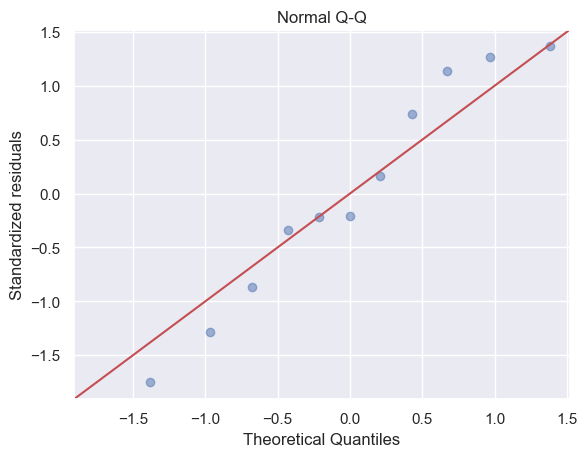

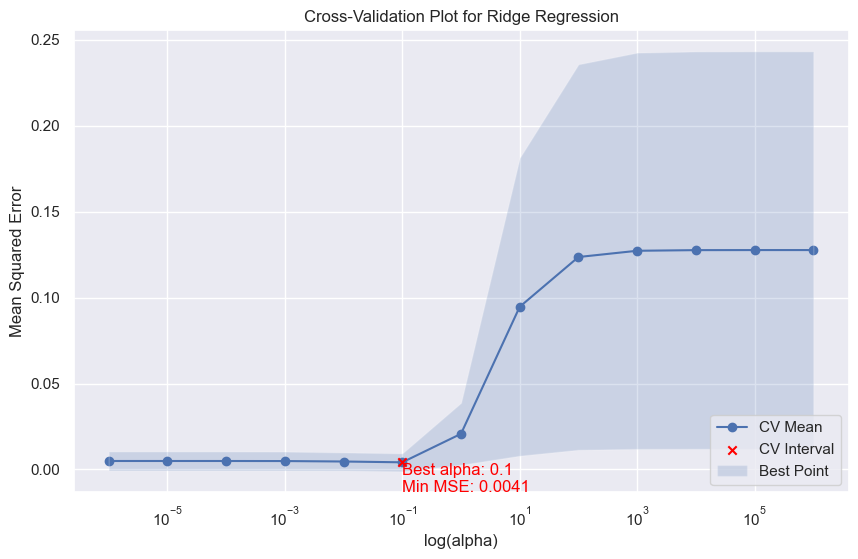

                                STEPS AIC                              
Selected Features: ['X2', 'X3'] 
AIC: -26.94418317331258 


In [376]:
ridge_research = RidgeRegressionResearch(data, column=explore_column)
ridge_research.info()
ridge_research.run_tests()
ridge_research.draw_plots()
ridge_new_model, selected_features_ridge = ridge_research.stepwise_selection(criteria='AIC')

                                     X1_t                                     
Dep. Variable:                   X1_t   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           7.03e-07
Time:                        02:18:42   Log-Likelihood:                 14.886
No. Observations:                  11   AIC:                            -21.77
Df Residuals:                       8   BIC:                            -20.18
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0781      0.048     -1.635      0.1

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,1.763677,1.763677,328.134030,8.858190e-08
X3,1.0,0.048853,0.048853,9.089236,1.669018e-02
Residual,8.0,0.042999,0.005375,NaN,NaN


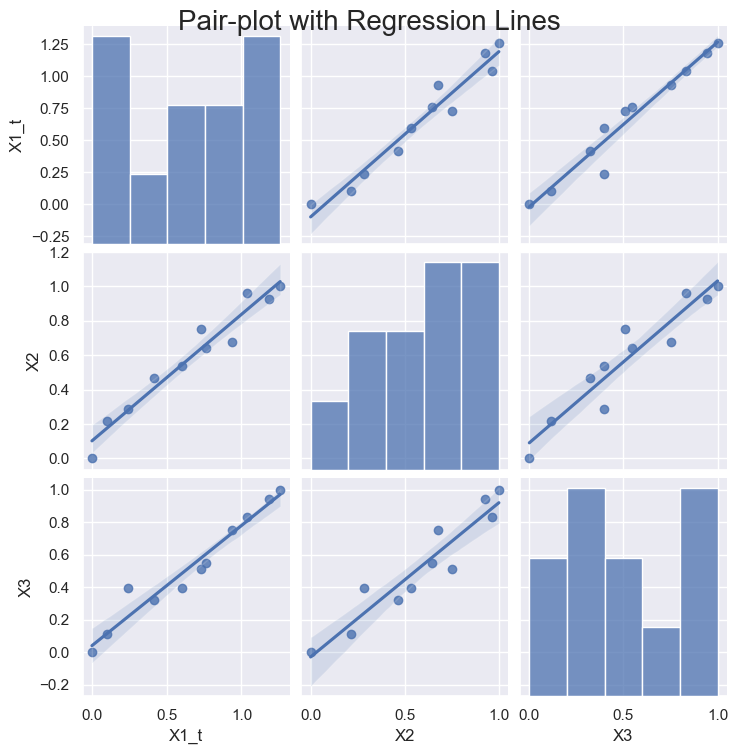

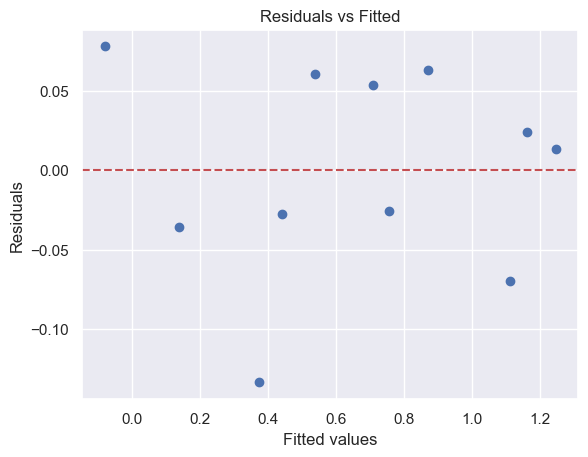

D:\Projects\PyCharm_Projects\Matt\Task_5\RRR.py:92: RuntimeWarning: invalid value encountered in sqrt
  # outlier_test_results = self.results.outlier_test(method='bonferroni')


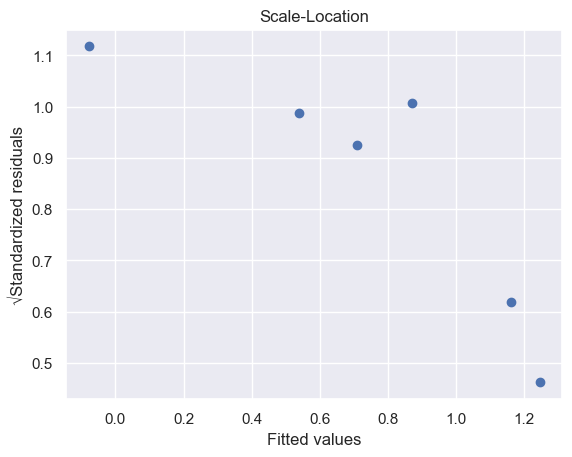

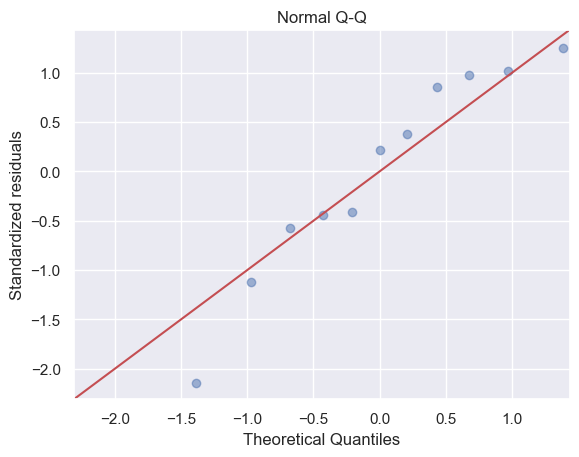

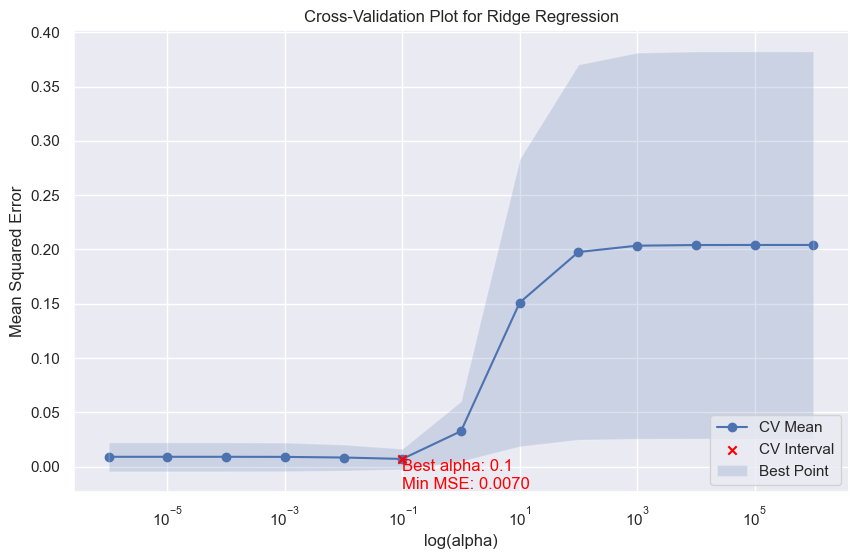

Breusch-Pagan test: 
LM statistic: 4.685668010060063      LM-Test p-value: 0.09605503168583132 
F-statistic: 2.9682747232963482       F-Test p-value: 0.10857726753305245


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


In [377]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1)  # + 1 чтобы не было 0-значений

new_data = pd.DataFrame()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed
new_data[selected_features_ridge] = data[selected_features_ridge]

# Проводим анализ заново
enhanced_research = RidgeRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()

### Линейная регрессия

                                      X1                                      
Dep. Variable:                     X1   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     168.8
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.87e-07
Time:                        02:18:45   Log-Likelihood:                 17.472
No. Observations:                  11   AIC:                            -28.94
Df Residuals:                       8   BIC:                            -27.75
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0365      0.038     -0.966      0.3

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,1.111639,1.111639,330.961873,8.565571e-08
X3,1.0,0.022058,0.022058,6.567259,3.350767e-02
Residual,8.0,0.026871,0.003359,NaN,NaN


,dfb_Intercept,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.422737,-0.052463,0.176840,0.084269,-0.858890,0.255233,-0.502801,-0.843237,-0.493637
1,-0.044153,-0.046045,0.057394,0.003050,-0.205405,0.178214,-0.095654,-0.192648,-0.089713
2,0.030537,-0.239187,0.228904,0.028126,-0.368773,0.382894,-0.290481,-0.347925,-0.274060
3,0.311203,-0.421738,0.254303,0.179757,-1.263604,0.252472,-0.734351,-1.321168,-0.767804
4,0.085455,0.121479,-0.108516,0.040338,1.022046,0.103823,0.347872,1.025316,0.348985
5,0.042693,0.023122,-0.057192,0.006666,-0.211590,0.308762,-0.141414,-0.198480,-0.132652
6,-1.429947,1.656401,-1.438072,0.781478,-1.913693,0.390306,-1.531155,-2.431014,-1.945066
7,0.197380,0.286067,-0.325110,0.084242,1.175714,0.154570,0.502720,1.209198,0.517037
8,0.203845,-0.628953,0.716608,0.234543,1.365835,0.273878,0.838826,1.459009,0.896048
9,0.697729,-0.287827,0.094895,0.169489,0.829946,0.424687,0.713070,0.812091,0.697729


,student_resid,unadj_p,bonferroni(p)
0,-0.843237,0.426967,1.000000
1,-0.192648,0.852705,1.000000
2,-0.347925,0.738124,1.000000
3,-1.321168,0.227992,1.000000
4,1.025316,0.339335,1.000000
5,-0.198480,0.848311,1.000000
6,-2.431014,0.045353,0.498883
7,1.209198,0.265838,1.000000
8,1.459009,0.187929,1.000000
9,0.812091,0.443475,1.000000


Breusch-Pagan test: 
LM statistic: 2.329287116901141      LM-Test p-value: 0.31203386404693556 
F-statistic: 1.0745539142191813       F-Test p-value: 0.3860543775047665


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


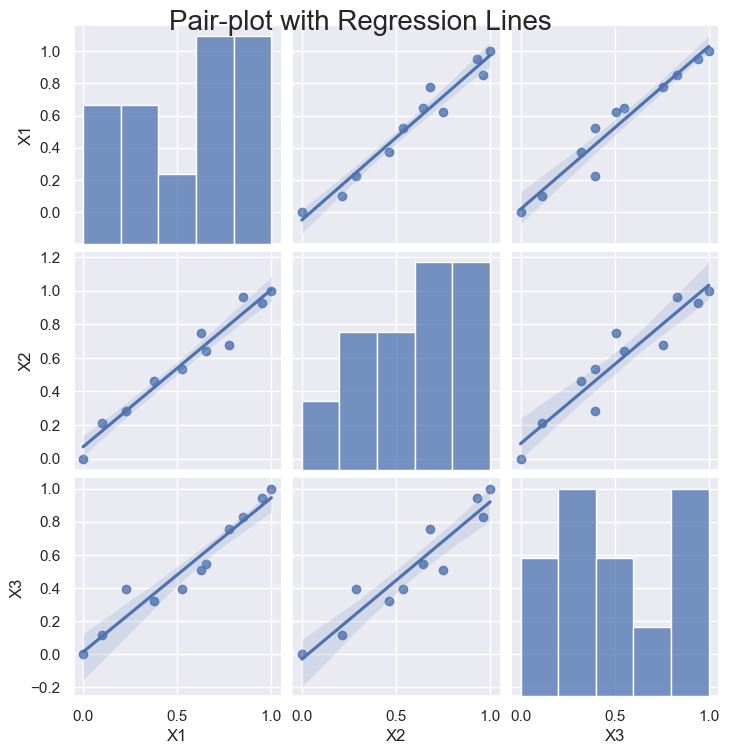

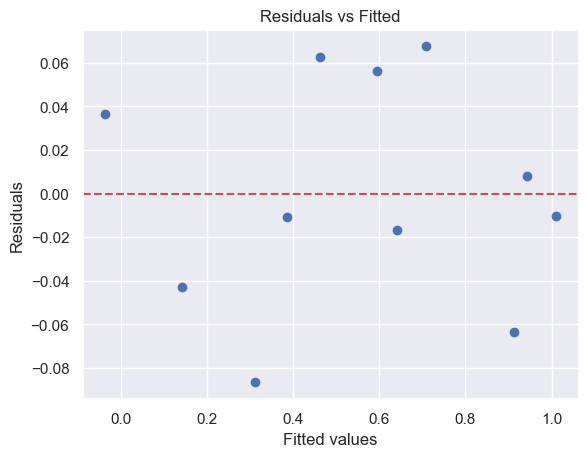

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


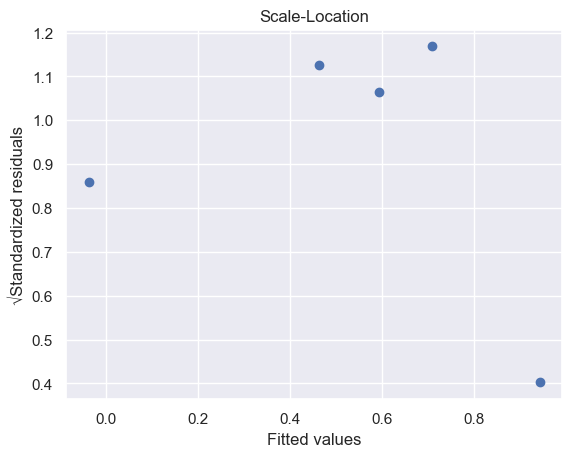

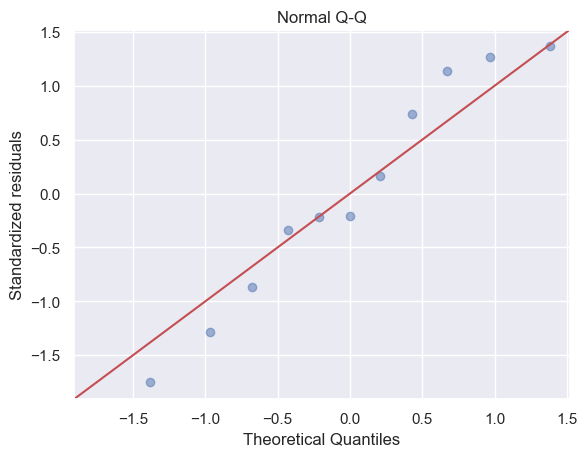

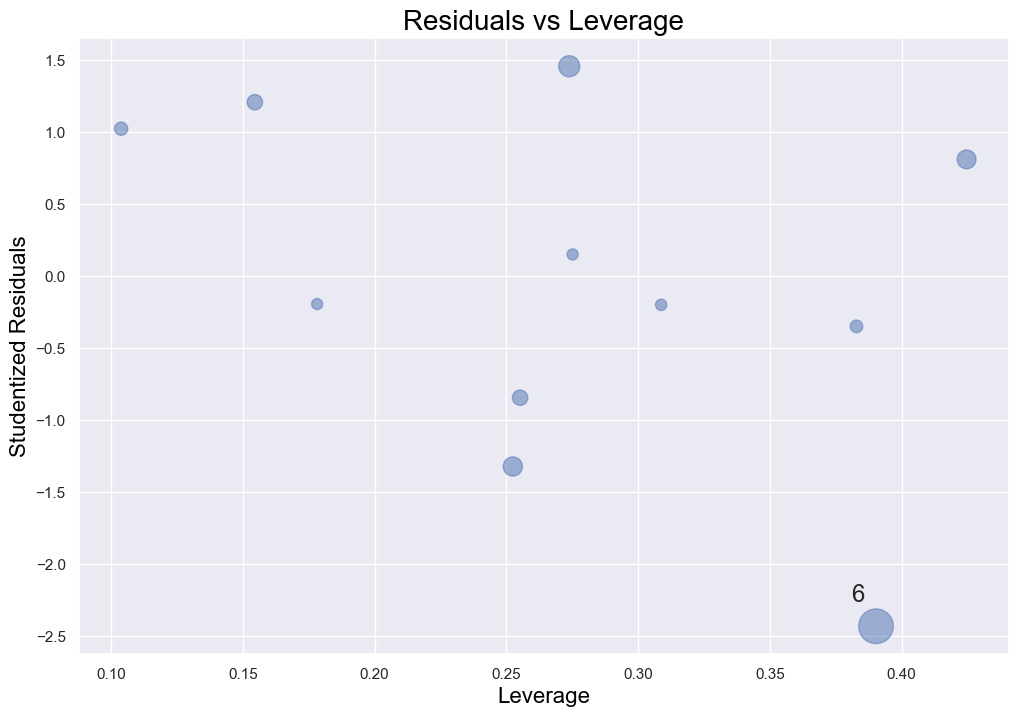

                                STEPS AIC                              
Selected Features: ['X2', 'X3'] 
AIC: -28.94418317331258 


In [378]:
linear_research = LinearRegressionResearch(data, column=explore_column)
linear_research.info()
linear_research.run_tests()
linear_research.draw_plots()
linear_new_model, selected_features_linear = linear_research.stepwise_selection(criteria='AIC')

                                     X1_t                                     
Dep. Variable:                   X1_t   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     168.6
Date:                Wed, 29 Nov 2023   Prob (F-statistic):           2.88e-07
Time:                        02:18:48   Log-Likelihood:                 14.886
No. Observations:                  11   AIC:                            -23.77
Df Residuals:                       8   BIC:                            -22.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0781      0.048     -1.635      0.1

D:\PythonEnv\Matt\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
X2,1.0,1.763677,1.763677,328.134030,8.858190e-08
X3,1.0,0.048853,0.048853,9.089236,1.669018e-02
Residual,8.0,0.042999,0.005375,NaN,NaN


,dfb_Intercept,dfb_X2,dfb_X3,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.271734,-0.033723,0.113672,0.036811,-0.567664,0.255233,-0.332315,-0.542030,-0.317308
1,-0.090716,-0.094603,0.117921,0.012660,-0.418484,0.178214,-0.194882,-0.395812,-0.184324
2,0.037303,-0.292176,0.279615,0.041621,-0.448597,0.382894,-0.353359,-0.425004,-0.334774
3,0.264325,-0.358210,0.215997,0.137316,-1.104404,0.252472,-0.641831,-1.122155,-0.652147
4,0.062545,0.088911,-0.079423,0.023003,0.771800,0.103823,0.262696,0.750432,0.255423
5,-0.044107,-0.023888,0.059087,0.007112,0.218559,0.308762,0.146072,0.205056,0.137047
6,-2.283498,2.645123,-2.296473,1.165683,-2.337244,0.390306,-1.870040,-3.882111,-3.106095
7,0.145725,0.211202,-0.240028,0.049836,0.904294,0.154570,0.386664,0.892747,0.381727
8,0.142343,-0.439190,0.500399,0.129884,1.016399,0.273878,0.624220,1.018808,0.625700
9,1.300310,-0.536403,0.176850,0.485315,1.404399,0.424687,1.206625,1.513439,1.300310


,student_resid,unadj_p,bonferroni(p)
0,-0.542030,0.604615,1.000000
1,-0.395812,0.704030,1.000000
2,-0.425004,0.683593,1.000000
3,-1.122155,0.298808,1.000000
4,0.750432,0.477456,1.000000
5,0.205056,0.843364,1.000000
6,-3.882111,0.006037,0.066402
7,0.892747,0.401640,1.000000
8,1.018808,0.342207,1.000000
9,1.513439,0.173934,1.000000


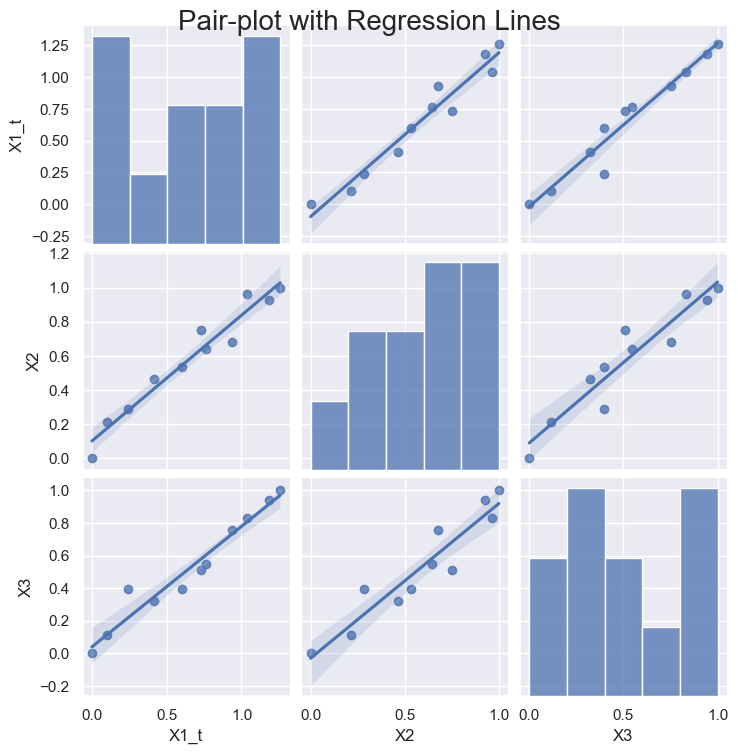

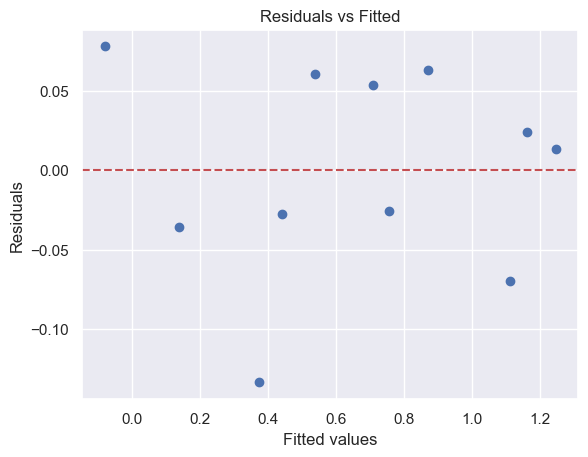

D:\PythonEnv\Matt\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


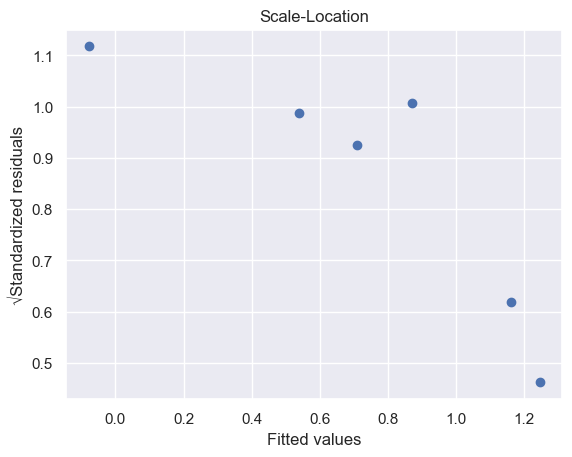

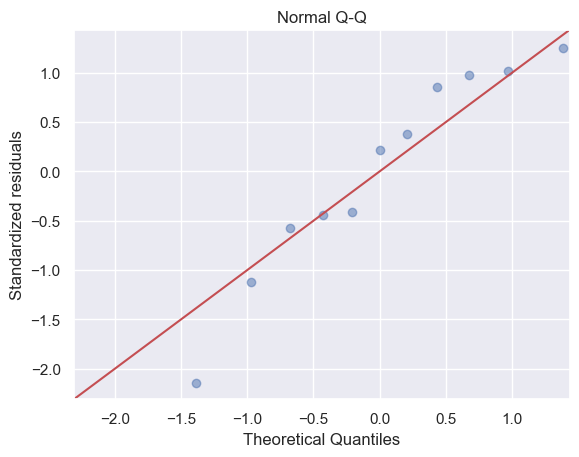

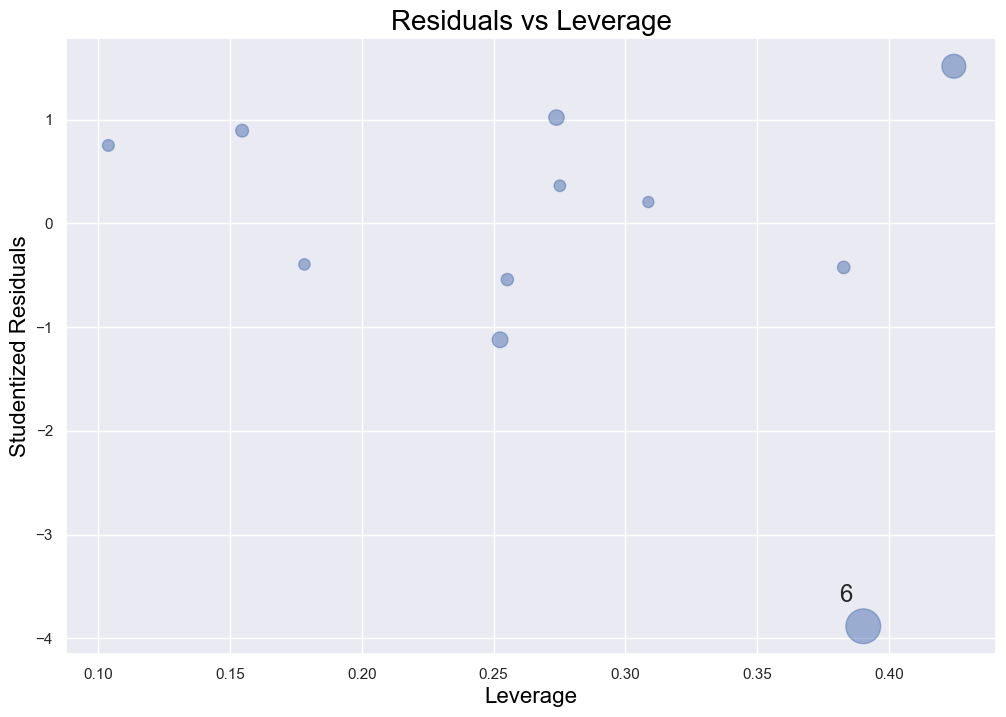

Breusch-Pagan test: 
LM statistic: 4.685668010060063      LM-Test p-value: 0.09605503168583132 
F-statistic: 2.9682747232963482       F-Test p-value: 0.10857726753305245


,Variable,VIF,Tolerance
0,X2,36.241532,0.027593
1,X3,36.241532,0.027593


In [379]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1)  # + 1 чтобы не было 0-значений

new_data = pd.DataFrame()
new_explore_column = explore_column + '_t'
new_data[new_explore_column] = y_transformed
new_data[selected_features_linear] = data[selected_features_linear]

# Проводим анализ заново
enhanced_research = LinearRegressionResearch(new_data, column=new_explore_column)
enhanced_research.info()
enhanced_research.draw_plots()
enhanced_research.run_tests()